## Google Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setting up Google Colab

In [2]:
# Check if fastai and pytorch are installed
!pip list | grep -e fastai -e torch -e torchvision

# If not, uncomment this line and run to install them
#!pip install torch torchvision fastai

fastai                        2.7.11
torch                         1.13.1+cu116
torchaudio                    0.13.1+cu116
torchsummary                  1.5.1
torchtext                     0.14.1
torchvision                   0.14.1+cu116


## Data Preparing

In [3]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torch.utils.data import random_split

In [115]:
trans = transforms.Compose([transforms.Resize((32, 32)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                            ])
trainset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/Multi_Classification_Sample_Images",
                                            transform = trans)

In [116]:
trainset.__getitem__(18)

(tensor([[[-0.1373, -0.3098,  0.1686,  ...,  0.0980,  0.0980,  0.0980],
          [-0.0980, -0.2235,  0.1922,  ...,  0.1137,  0.1137,  0.0980],
          [-0.2314, -0.2157,  0.2078,  ...,  0.1373,  0.1216,  0.0431],
          ...,
          [ 0.6157,  0.6471,  0.6157,  ...,  0.8118,  0.7725,  0.7333],
          [ 0.6157,  0.6627,  0.6392,  ...,  0.4824,  0.4588,  0.4588],
          [ 0.6000,  0.6471,  0.6471,  ...,  0.2941,  0.2941,  0.3098]],
 
         [[-0.1216, -0.3020,  0.3176,  ...,  0.3490,  0.3412,  0.2941],
          [-0.0980, -0.2000,  0.3255,  ...,  0.3569,  0.3255,  0.1216],
          [-0.2941, -0.2078,  0.3255,  ...,  0.3490,  0.1686, -0.1059],
          ...,
          [ 0.1843,  0.2157,  0.1843,  ...,  0.4431,  0.3882,  0.3255],
          [ 0.1922,  0.2314,  0.2000,  ...,  0.2549,  0.2157,  0.1843],
          [ 0.1765,  0.2235,  0.2157,  ...,  0.0902,  0.1059,  0.0980]],
 
         [[-0.1294, -0.3412,  0.4745,  ...,  0.6157,  0.6078,  0.5373],
          [-0.1451, -0.2157,

In [117]:
len(trainset)

1200

In [118]:
classes = trainset.classes
classes

['adress',
 'backswing',
 'backswingtop',
 'downswing',
 'finish',
 'follow',
 'impact',
 'takeback']

## Data Upload Via DataLoader

In [119]:
trainset, testset = random_split(trainset, [960, 240])
print(len(trainset), len(testset))

960 240


In [120]:
testset, valset = random_split(testset, [120, 120])
print(len(testset), len(valset))

120 120


In [143]:
batch_size = 8
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2) # 훈련용
validloader = DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2) # 검증용
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2) # 테스트용

In [144]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(labels)

tensor([2, 1, 6, 2, 2, 4, 5, 1])


## Image Visualization

In [12]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    np_img = img.numpy()
    # plt.imshow(np_img)
    plt.imshow(np.transpose(np_img, (1,2,0)))

    print(np_img.shape)
    print((np.transpose(np_img, (1,2,0))).shape)

torch.Size([4, 3, 224, 224])
(3, 228, 906)
(228, 906, 3)
torch.Size([4, 3, 224, 224])
torch.Size([3, 228, 906])
backswing finish impact follow 


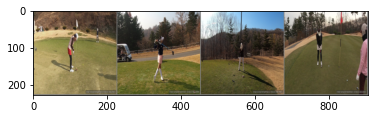

In [13]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(4)))

## Dataset Verification Via Visualization

In [122]:
print(type(trainset[0][0]), type(trainset[0][1]))

<class 'torch.Tensor'> <class 'int'>


In [123]:
trainset[0][0].size()

torch.Size([3, 32, 32])

In [124]:
# 1번 샘플
sample_img = trainset[1][0]
sample_img.size()

torch.Size([3, 32, 32])

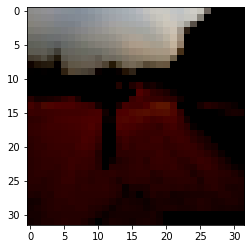

In [125]:
plt.imshow(sample_img.permute(1, 2, 0))

In [126]:
trainset[1][1]

5

- numpy로 변환한 뒤 matplotlib으로 표시할 경우

In [127]:
sample_img.size()

torch.Size([3, 32, 32])

In [128]:
numpy_sample = sample_img.numpy()
numpy_sample.shape

(3, 32, 32)

In [129]:
type(numpy_sample)

numpy.ndarray

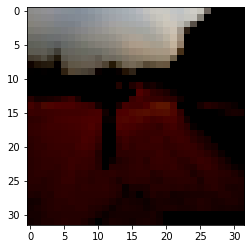

In [130]:
plt.imshow(numpy_sample.transpose(1, 2, 0)) # 차원 순서 변경할 때 tensor는 permute, ndarray는 transpose

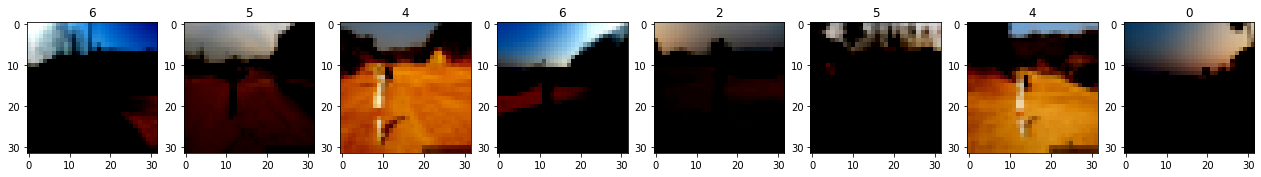

In [131]:
figure, axes = plt.subplots(nrows=1, ncols=8, figsize=(22, 6))
for i in range(8):
  axes[i].imshow(trainset[i][0].permute(1, 2, 0), cmap='gray')
  axes[i].set_title(trainset[i][1])   

## Data Separation

**trainset**

In [132]:
sample_img = testset[100][0]
sample_img.size()

torch.Size([3, 32, 32])

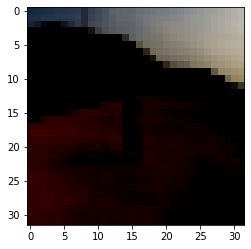

In [133]:
plt.imshow(sample_img.permute(1, 2, 0))

In [134]:
testset[100][0].size(), testset[100][1]

(torch.Size([3, 32, 32]), 1)

In [77]:
trainset[600][0].size(), trainset[600][1]

(torch.Size([3, 224, 224]), 6)

**testset, valset**

In [78]:
sample_img1 = valset[100][0]
sample_img1.size()

torch.Size([3, 224, 224])

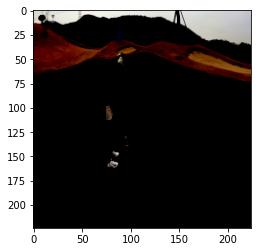

In [79]:
plt.imshow(sample_img1.permute(1, 2, 0))

In [80]:
valset[100][0].size(), valset[100][1]

(torch.Size([3, 224, 224]), 5)

In [81]:
valset[20][0].size(), valset[20][1]

(torch.Size([3, 224, 224]), 1)

#### More Variable Visualization

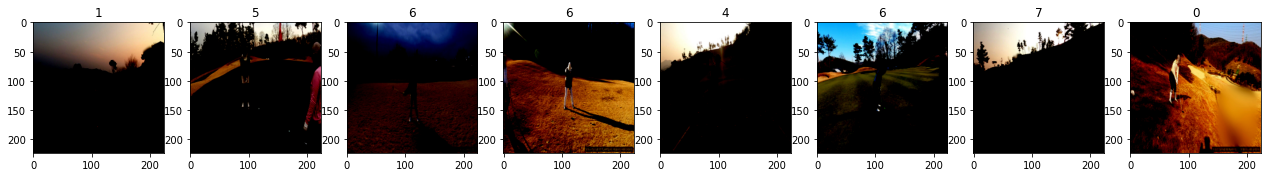

In [82]:
figure, axes = plt.subplots(nrows=1, ncols=8, figsize=(22, 6))
for i in range(8):
  axes[i].imshow(trainset[i][0].permute(1, 2, 0), cmap='gray')
  axes[i].set_title(trainset[i][1])

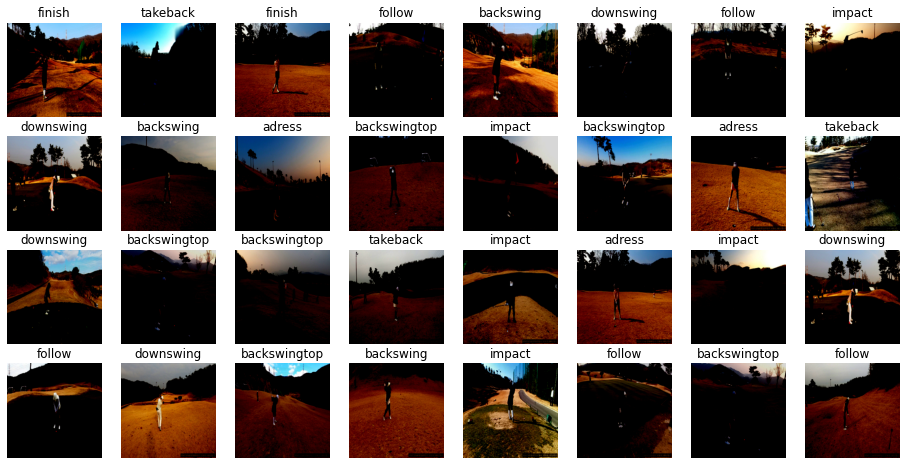

In [83]:
labels_map = {0 : 'adress', 1 : 'backswing', 2: 'backswingtop', 3: 'downswing', 4: 'finish', 5: 'follow', 6: 'impact', 7: 'takeback'}

figure, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
axes = axes.flatten()

for i in range(32):
    rand_i = np.random.randint(0, len(trainset))
    image = trainset[rand_i][0].permute(1, 2, 0)
    axes[i].axis('off')
    axes[i].imshow(image)
    axes[i].set_title(labels_map[trainset[rand_i][1]])    

## Model Organization

- ResNet Structure

In [135]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
import copy
import sys, time
from torch.autograd import Variable

In [145]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion*planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=8):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2,2,2,2])

def ResNet34():
    return ResNet(BasicBlock, [3,4,6,3])

def ResNet50():
    return ResNet(Bottleneck, [3,4,6,3])

def ResNet101():
    return ResNet(Bottleneck, [3,4,23,3])

def ResNet152():
    return ResNet(Bottleneck, [3,8,36,3])


def test():
    net = ResNet101()
    y = net(torch.randn(1,3,32,32))
    print(y.size())

In [112]:
model = ResNet101()
from torchsummary import summary
summary(model.cuda(), (3,32,32))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]           4,096
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7          [-1, 256, 32, 32]          16,384
       BatchNorm2d-8          [-1, 256, 32, 32]             512
            Conv2d-9          [-1, 256, 32, 32]          16,384
      BatchNorm2d-10          [-1, 256, 32, 32]             512
       Bottleneck-11          [-1, 256, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          16,384
      BatchNorm2d-13           [-1, 64, 32, 32]             128
           Conv2d-14           [-1, 64,

In [113]:
class TrainModel():
    def __init__(self,model, criterion, optimizer, trainloader, testloader, num_epochs=5):
        
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

        self.model = model.to(self.device)
        self.trainloader =trainloader
        self.testloader = testloader
        self.criterion = criterion
        self.optimizer = optimizer
        self.num_epochs = num_epochs
        self.best_acc_wts = copy.deepcopy(self.model.state_dict())
        self.best_acc =0.0

        
        for epoch in range(1, self.num_epochs+1):
            print('Epoch {}/{}'.format(epoch, self.num_epochs))
            self.train()
            self.test()

        model.load_state_dict(self.best_acc_wts)

    def train(self):
        self.model.train()
        train_loss = 0
        correct = 0
        total = 0
        for batch_idx, (inputs, targets) in enumerate(self.trainloader):
            inputs, targets = inputs.to(self.device), targets.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, targets.long())
            loss.backward()
            self.optimizer.step()

            train_loss += loss.data.cpu().numpy()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        epoch_loss = train_loss /len(self.trainloader)
        epoch_acc = correct / total
        print('train | Loss: {:.4f} Acc: {:.4f}'.format( epoch_loss, epoch_acc))

    def test(self):
        global best_acc
        self.model.eval()
        test_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(self.testloader):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets.long())

                test_loss += loss.data.cpu().numpy()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

            epoch_loss = test_loss /len(self.testloader)
            epoch_acc = correct / total
            print('test | Loss: {:.4f} Acc: {:.4f}'.format( epoch_loss, epoch_acc))
            if epoch_acc >= self.best_acc:
                self.best_acc = epoch_acc
                self.best_acc_wts = copy.deepcopy(self.model.state_dict())

In [162]:
TrainModel(model, criterion=criterion, optimizer=optimizer,trainloader=trainloader,testloader=validloader,num_epochs=10)

Epoch 1/10
train | Loss: 2.1527 Acc: 0.1719
test | Loss: 2.4020 Acc: 0.2167
Epoch 2/10
train | Loss: 2.0940 Acc: 0.1646
test | Loss: 3.2324 Acc: 0.1833
Epoch 3/10
train | Loss: 2.0948 Acc: 0.1771
test | Loss: 2.6611 Acc: 0.1167
Epoch 4/10
train | Loss: 2.0488 Acc: 0.1740
test | Loss: 3.2925 Acc: 0.2250
Epoch 5/10
train | Loss: 2.0135 Acc: 0.1906
test | Loss: 2.5711 Acc: 0.1917
Epoch 6/10
train | Loss: 2.0107 Acc: 0.2042
test | Loss: 2.2332 Acc: 0.2417
Epoch 7/10
train | Loss: 2.0328 Acc: 0.2000
test | Loss: 2.6443 Acc: 0.1167
Epoch 8/10
train | Loss: 2.0496 Acc: 0.2021
test | Loss: 2.3014 Acc: 0.1583
Epoch 9/10
train | Loss: 2.0473 Acc: 0.1854
test | Loss: 3.3143 Acc: 0.2000
Epoch 10/10
train | Loss: 2.1094 Acc: 0.1677
test | Loss: 2.2243 Acc: 0.2583


In [163]:
def test(model,testloader,criterion):
        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(testloader):
                inputs,targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets.long())     

                test_loss += loss.data.cpu().numpy()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()
                
            epoch_loss = test_loss / len(testloader)
            epoch_acc = correct / total
            print('test | Loss: {:.4f} Acc: {:.4f}'.format( epoch_loss, epoch_acc))

test(model,testloader,criterion)

test | Loss: 2.4169 Acc: 0.2083


# 실행 오류 코드

## Model Compile

In [152]:
learning_rate = 0.001 
# 손실함수
criterion = nn.CrossEntropyLoss()
# 옵티마이저(경사하강법, 최적화 함수)
# optimizer = optim.SGD(model.parameters(), lr = learning_rate)
# 규제의 강도 설정 weight_decay
# optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay=0.001)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [153]:
# Learning Rate Schedule
# https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ReduceLROnPlateau.html

#monitoring 하고 있는 값(valid_loss)이 patience 기간동안(onPlateau) 줄어들지 않을때 lr에 factor(0.1)를 곱해준다.
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=7, factor=0.1, verbose=True)

## Model Training

In [154]:
# torch.no_grad()
# https://pytorch.org/docs/stable/generated/torch.no_grad.html
# Context-manager that disabled gradient calculation.

# Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward(). 
# It will reduce memory consumption for computations that would otherwise have requires_grad=True.

In [155]:
def validation(model, validloader, criterion):
  # 전방향 예측후 나온 점수(logits)의 최대값을 최종 예측으로 준비
  # 이 최종 예측과 정답을 비교
  # 전체 중 맞은 것의 개수 비율을 정확도(accuracy)로 계산
  valid_accuracy = 0
  valid_loss = 0

  # 전방향 예측을 구할 때는 gradient가 필요가 없음
  with torch.no_grad():
    for images, labels in validloader: # 10000개의 데이터에 대해 16개씩(미니배치 사이즈) 10000/16번을 iterations
      # 0. Data를 GPU로 보내기
      images, labels = images.to(device), labels.to(device)

      # 1. 입력데이터 준비
      # not Flatten!!
      # images.resize_(images.size()[0], 784) # 16, 1, 28, 28
      
      # 2. 전방향(Forward) 예측 
      logits = model.forward(images) # 점수 반환
      _, preds = torch.max(logits, 1) # 16개에 대한 최종 예측
      # preds= probs.max(dim=1)[1] 
      correct = (preds == labels).sum()

      accuracy = correct / images.shape[0]
      loss = criterion(logits, labels) # 16개에 대한 loss
      
      valid_accuracy += accuracy
      valid_loss += loss.item() # tensor 값을 꺼내옴
    

  return valid_loss, valid_accuracy # validloader 전체 대한 총 loss, 총 accuracy

In [156]:
# 파이토치에서 텐서보드 사용하기
# https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html

In [157]:
from torch.utils.tensorboard import SummaryWriter

writer  = SummaryWriter()

In [158]:
def train(model, epochs, criterion, optimizer):
  steps = 0
  min_loss = 10000
  max_accuracy = 0

  trigger = 0
  patience = 13 # for Early stopping

  # 1 에폭(epoch)당 반복수
  #steps_per_epoch = len(trainset)/batch_size # 2500 iterations
  steps_per_epoch = len(trainloader) # 2500 iterations

  for epoch in range(epochs):
    model.train()
    train_loss = 0
    for images, labels in iter(trainloader): # 이터레이터로부터 미니배치 16개씩을 가져와 images, labels에 준비
      steps += 1
      # 0. Data를 GPU로 보내기
      images, labels = images.to(device), labels.to(device)

      # 1. 입력 데이터 준비
      # not Flatten!!
      # images.resize_(images.size()[0], 784) # 16, 1, 28, 28

      # 2. 전방향(Forward) 예측 
      outputs = model.forward(images) # 예측
      loss = criterion(outputs, labels) # 예측과 결과를 통해 Cross Entropy Loss 반환

      # 3. 역방향(Backward) 오차(Gradient) 전파
      optimizer.zero_grad() # 파이토치에서 gradient가 누적되지 않게 하기 위해
      loss.backward()

      # 4. 경사하강법으로 모델 파라미터 업데이트
      optimizer.step() # W <- W -lr*Gradient

      train_loss += loss.item()
      if (steps % steps_per_epoch) == 0: # step : 2500, .... (epoch 마다)
        model.eval() # 배치 정규화, 드롭아웃이 적용될 때는 model.forward 연산이 training때와 다르므로 반드시 설정
        valid_loss, valid_accuracy = validation(model, valset, criterion)

        # tensorboad 시각화를 위한 로그 이벤트 등록
        writer.add_scalar("Loss/train", train_loss/len(trainloader), epoch)
        writer.add_scalar("Loss/valid", valid_loss/len(valset), epoch)
        writer.add_scalars("Loss/train and valid",
                          {'train' : train_loss/len(trainloader),
                          'valid' : valid_loss/len(valset)}, epoch)
        
        writer.add_scalar("Valid Accuracy", valid_accuracy/len(valset), epoch)


        print('Epoch : {}/{}.....'.format(epoch+1, epochs),
              'Train Loss : {:.3f}'.format(train_loss/len(trainloader)),
              'Valid Loss : {:.3f}'.format(valid_loss/len(valset)),
              'Valid Accuracy : {:.3f}'.format(valid_accuracy/len(valset)))
        
        # Best model 저장
        # option 1
        # if valid_loss < min_loss:
        #   min_loss = valid_loss
        #   torch.save(model.state_dict(), 'best_checkpoint.pth')

        # option 2
        if valid_accuracy > max_accuracy: 
          max_accuracy = valid_accuracy
          torch.save(model.state_dict(), 'best_checkpoint.pth')

        # Early Stopping (조기 종료)
        if valid_loss > min_loss:
          trigger += 1 # valid loss가 min_loss 를 갱신하지 못할때마다 증가
          print('trigger : ', trigger )
          if trigger > patience:
            print('Early Stopping!!!')
            print('Traning step is finished!!')
            writer.flush()  
            return   
        else:
          trigger = 0
          min_loss = valid_loss


        train_loss = 0
        model.train()

        # Learning Rate Scheduler
        scheduler.step(valid_loss)

  writer.flush()   

In [161]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [160]:
epochs=15
train(model, epochs, criterion, optimizer)

AttributeError: ignored